In [1]:
import pandas as pd
import numpy as np

import pymysql
from IPython.display import display, HTML

In [2]:
# Takes a df and converts it to 3D tensor
# Each sample will have k time steps

def samples_label_get_first(df_input):
    
    k = thresholdd
    input_cols = label_col
    
    
    # takes a df
    # Put your inputs into a single list
    
    df = pd.DataFrame()
    
    df['single_input_vector'] = df_input.sort_values(by=['HeartBeatTime'])[input_cols].head(1).apply(tuple, axis=1).apply(list)
    
    # Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
    df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
        
    # The starting point
    df['cumulative_input_vectors'] = df['single_input_vector'].shift(0)
    
    for i in range(1,k):
        df['cumulative_input_vectors'] += df['single_input_vector'].shift(i)
          
    df.dropna(inplace=True)     # does operation in place & returns None

    # Extract your training data
    X_ = np.asarray(df.cumulative_input_vectors)
    
    # Use hstack to and reshape to make the inputs a 3d vector
    X = np.vstack(X_).reshape(len(df), k, len(input_cols))
    
    # Clean up
    del df
    
    return X
    # returns 3D array

In [3]:
# Takes a df and converts it to 3D tensor
# Each sample will have k time steps

def samples_features_get_first(df_input):
    
    k = thresholdd
    input_cols = train_feat
    
    # takes a df
    # Put your inputs into a single list
    
    df = pd.DataFrame()
    
    df['single_input_vector'] = df_input.sort_values(by=['HeartBeatTime'])[input_cols].head(1).apply(tuple, axis=1).apply(list)
    
    # Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
    df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
        
    # The starting point
    df['cumulative_input_vectors'] = df['single_input_vector'].shift(0)
    
    for i in range(1,k):
        df['cumulative_input_vectors'] += df['single_input_vector'].shift(i)
          
    df.dropna(inplace=True)     # does operation in place & returns None

    # Extract your training data
    X_ = np.asarray(df.cumulative_input_vectors)
    
    # Use hstack to and reshape to make the inputs a 3d vector
    X = np.vstack(X_).reshape(len(df), k, len(input_cols))
    
    # Clean up
    del df
    
    return X
    # returns 3D array

In [5]:
# Label Column ('Status_Failed' is the label column)
label_col = ['Status_Failed']

In [6]:
thresholdd=1 #Check it matched the title

In [7]:
##################################################

In [8]:
import pickle
with open('mega_training_features.pickle', 'rb') as handle:
    train_feat = pickle.load(handle)

## Cleaned df to 3D tensor

### Make X

In [9]:
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing

multiprocessing.cpu_count()

def applyParallel(dfGrouped, func):
    retLst = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(func)(group) for name, group in dfGrouped)
    return retLst

In [10]:
# Label Column ('Status_Failed' is the label column)
label_col = ['Status_Failed']

In [11]:
def cv(x):
    return x * x

applyParallel([(b,b) for b in range(10)], cv)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

#### Build Y (each job separately)

In [12]:
label_col

['Status_Failed']

# Start: Build test set from 'takeoutdf'

## Build X_test, Y_test using each JobID separately

In [13]:
takeoutdf = pd.read_pickle('mega_takeoutdf_for_testing.pickle')
takeoutdf.shape

(8778415, 88)

In [14]:
takeoutdf.Status_Failed.value_counts()

0    5544201
1    3234214
Name: Status_Failed, dtype: int64

In [15]:
# Training Features

In [16]:
print(len(train_feat)) 

84


In [17]:
(train_feat)

['AvailableDiskSpace',
 'CPUConsumed',
 'LoadAverage',
 'MemoryUsed',
 'RSS',
 'Vsize',
 'RescheduleCounter',
 'JobType_MCProduction',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'JobType_Test',
 'JobType_User',
 'Site_ARC.DESY.de',
 'Site_ARC.KIT.de',
 'Site_ARC.LMU2.de',
 'Site_ARC.MPPMU.de',
 'Site_ARC.SIGNET.si',
 'Site_CLOUD.AWS_Sydney.au',
 'Site_CLOUD.AWS_Tokyo.jp',
 'Site_CLOUD.AWS_Virginia.us',
 'Site_CLOUD.CC1_Krakow.pl',
 'Site_DIRAC.BINP.ru',
 'Site_DIRAC.Beihang.cn',
 'Site_DIRAC.CINVESTAV.mx',
 'Site_DIRAC.DESY.de',
 'Site_DIRAC.Hokudai.jp',
 'Site_DIRAC.IITG.in',
 'Site_DIRAC.MIPT.ru',
 'Site_DIRAC.NDU.jp',
 'Site_DIRAC.Nagoya.jp',
 'Site_DIRAC.Nara-WU.jp',
 'Site_DIRAC.Niigata.jp',
 'Site_DIRAC.Osaka-CU.jp',
 'Site_DIRAC.PNNL.us',
 'Site_DIRAC.PNNL2.us',
 'Site_DIRAC.RCNP.jp',
 'Site_DIRAC.SSU.kr',
 'Site_DIRAC.TIFR.in',
 'Site_DIRAC.TMU.jp',
 'Site_DIRAC.Test.jp',
 'Site_DIRAC.Tokyo.jp',
 'Site_DIRAC.UAS.mx',
 'Site_DIRAC.UVic.ca',
 'Site_DIRAC.Yamagata.jp',
 'Site

In [18]:
# Label Column ('Status_Failed' is the label column)
print(label_col)

['Status_Failed']


In [19]:
takeoutdf.shape

(8778415, 88)

In [20]:
takeoutdf.isnull().values.ravel().sum()

0

In [21]:
takeoutdf = takeoutdf.dropna()

In [22]:
takeoutdf.isnull().values.ravel().sum()

0

In [23]:
takeoutdf.columns

Index(['JobID', 'HeartBeatTime', 'AvailableDiskSpace', 'CPUConsumed',
       'LoadAverage', 'MemoryUsed', 'RSS', 'Vsize', 'WallClockTime',
       'RescheduleCounter', 'JobType_MCProduction', 'JobType_MCProductionBGx0',
       'JobType_Merge', 'JobType_Test', 'JobType_User', 'Site_ARC.DESY.de',
       'Site_ARC.KIT.de', 'Site_ARC.LMU2.de', 'Site_ARC.MPPMU.de',
       'Site_ARC.SIGNET.si', 'Site_CLOUD.AWS_Sydney.au',
       'Site_CLOUD.AWS_Tokyo.jp', 'Site_CLOUD.AWS_Virginia.us',
       'Site_CLOUD.CC1_Krakow.pl', 'Site_DIRAC.BINP.ru',
       'Site_DIRAC.Beihang.cn', 'Site_DIRAC.CINVESTAV.mx',
       'Site_DIRAC.DESY.de', 'Site_DIRAC.Hokudai.jp', 'Site_DIRAC.IITG.in',
       'Site_DIRAC.MIPT.ru', 'Site_DIRAC.NDU.jp', 'Site_DIRAC.Nagoya.jp',
       'Site_DIRAC.Nara-WU.jp', 'Site_DIRAC.Niigata.jp',
       'Site_DIRAC.Osaka-CU.jp', 'Site_DIRAC.PNNL.us', 'Site_DIRAC.PNNL2.us',
       'Site_DIRAC.RCNP.jp', 'Site_DIRAC.SSU.kr', 'Site_DIRAC.TIFR.in',
       'Site_DIRAC.TMU.jp', 'Site_DIRAC.Test

###  Make X_test

In [24]:
takeoutdfgrouped = takeoutdf.groupby('JobID')

In [25]:
%%time
collectXtest = applyParallel(takeoutdfgrouped, samples_features_get_first)

CPU times: user 14min 47s, sys: 37.8 s, total: 15min 25s
Wall time: 18min 23s


In [26]:
# Testcase 1 of function sample_features:

check = 0
j_checks = takeoutdf.JobID.sample(20)

for k in j_checks:
    
    v = takeoutdfgrouped.get_group(k)
    
    if(True):
        #print(v.columns.tolist())
        A = np.array(v)
        #print(train_feat)
        B = samples_features_get_first(v)
        check += 1
        
        if(len(A) == len(B)):
            print(k, 'Lengths match', len(A), len(B))
        else:
            print(k, 'Lengths NOT match')
                
        
        # Tests
        for x,y in zip(A,B):
            #print(x)
            #print(y)
            
            if not (np.all([ m==n for (m,n) in zip(x[2:8] , y[0][0:6]) ])):
                print(k, 'NOK')
                
    if(check == len(j_checks)):
        break

41720187 Lengths NOT match
39742890 Lengths NOT match
44958036 Lengths NOT match
44940148 Lengths NOT match
47806264 Lengths NOT match
40002264 Lengths NOT match
37638669 Lengths NOT match
34264536 Lengths NOT match
41976333 Lengths NOT match
47899623 Lengths NOT match
42044174 Lengths NOT match
47214106 Lengths NOT match
41507497 Lengths NOT match
43320991 Lengths NOT match
37433649 Lengths NOT match
33122653 Lengths NOT match
47533576 Lengths NOT match
43049427 Lengths NOT match
41535916 Lengths NOT match
37560775 Lengths NOT match


In [27]:
takeoutdf.head(4)

,JobID,HeartBeatTime,AvailableDiskSpace,CPUConsumed,LoadAverage,MemoryUsed,RSS,Vsize,WallClockTime,RescheduleCounter,...,Status_Failed,UserPriority_1,UserPriority_2,UserPriority_3,UserPriority_4,UserPriority_5,UserPriority_6,UserPriority_7,UserPriority_9,UserPriority_10
1,23141083,2015-08-07 13:29:48,0.000076,0.000030,0.000501,0.041367,0.000670,0.000016,0.000010,0,...,1,0,0,0,0,0,0,0,0,0
42,23205643,2015-08-08 22:50:00,0.000030,0.000030,0.000508,0.047930,0.000305,0.000007,0.000012,0,...,1,0,0,0,0,0,0,0,0,0
43,23205643,2015-08-08 23:20:01,0.000030,0.006463,0.000551,0.049164,0.004673,0.000025,0.007010,0,...,1,0,0,0,0,0,0,0,0,0
44,23205643,2015-08-08 23:50:00,0.000030,0.013179,0.000551,0.050041,0.004786,0.000027,0.013997,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
collectXtest[100].shape

(1, 1, 84)

### Unpack X_test

In [29]:
X_test=[]

In [30]:
%%time
for x in collectXtest:
    #len(x)
    for i in x:
        X_test.append(i)

CPU times: user 1.64 s, sys: 304 ms, total: 1.95 s
Wall time: 1.95 s


In [31]:
import numpy as np
X_test = np.array(X_test)
X_test.shape

(801845, 1, 84)

In [32]:
## X_test is ready

### Make Y_test

In [33]:
%%time
collecttestlabel = applyParallel(takeoutdfgrouped, samples_label_get_first)

CPU times: user 15min 26s, sys: 1min 2s, total: 16min 28s
Wall time: 20min 48s


In [34]:
len(collecttestlabel)

801845

### Unpack Y_test

In [35]:
Y_t=[]

In [36]:
%%time
for x in collecttestlabel:
    #len(x)
    for i in x:
        Y_t.append(i)

CPU times: user 1.54 s, sys: 124 ms, total: 1.67 s
Wall time: 1.67 s


In [37]:
Y_t = np.array(Y_t)
Y_t.shape

(801845, 1, 1)

In [38]:
Y_test = np.array([x[0][0] for x in Y_t]).reshape(len(Y_t),1)
Y_test.shape

(801845, 1)

In [39]:
Y_test[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [40]:
## Y_test is ready

In [41]:
X_test.shape, Y_test.shape

((801845, 1, 84), (801845, 1))

In [42]:
sum(Y_test[:])/len(Y_test)

array([0.47167221])

In [43]:
del Y_t

# End test set from 'takeoutdf'

## Build Model

In [44]:
input_length = X_test.shape[1]

input_dim = X_test.shape[2]

# Output dimensions is the shape of a single output vector
# In this case it's just 1, but it could be more
output_dim = len(Y_test[0])

In [45]:
from keras.models import Model, Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
input_dim, input_length, output_dim

/data/home/a1singh/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(84, 1, 1)

# Model 1: prediction only on first measurements

In [46]:
from keras.models import load_model
model1 = load_model('mega_model1.pickle')
loss, accuracy = model1.evaluate(X_test, Y_test)
print(loss, accuracy)

801845/801845 [==============================] - 52s 65us/step
0.448157822674084 0.7879777263687112


# Accuracy

In [47]:
y_pred = model1.predict(X_test)

# Binary classification accuracy

In [48]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

In [49]:
np.mean(np.equal(y_true, y_predicted))

0.7879777263685624

# Precision, Recall, fscore

In [50]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_true, y_predicted)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.79354685 0.78147248]
recall: [0.80922346 0.76418003]
fscore: [0.80130849 0.77272952]
support: [423637 378208]


# Confusion matrix

In [53]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,342817,80820,423637
1,89189,289019,378208
All,432006,369839,801845


In [55]:
len(takeoutdf.JobID.unique().tolist())

801845

In [56]:
sum(takeoutdf["JobID"].value_counts()==1)

238995

In [57]:
len(X_test[(y_true==1) & (y_predicted==0)])

89189

In [59]:
# Verify that there is no intersection between training and test jobs

#list(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

In [60]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted]), len(y_predicted)

(369839.0, 801845)

In [61]:
#### Model 2 Start

# Model 2

In [62]:
model2 = load_model('mega_model2.pickle')

In [63]:
loss, accuracy = model2.evaluate(X_test, Y_test)

801845/801845 [==============================] - 84s 104us/step


# Accuracy

In [64]:
loss, accuracy

(0.42597377180186424, 0.7970443165451911)

In [65]:
# when taking 10 timesteps, and keeping separate test and training JobIDs
# loss, accuracy is: 
# on X_test, Y_test

In [66]:
y_pred = model2.predict(X_test)

In [67]:
## Save

# Binary classification accuracy

In [68]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

In [69]:
np.mean(np.equal(y_true, y_predicted))

0.7970443165449682

# Confusion matrix

In [70]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,350367,73270,423637
1,89469,288739,378208
All,439836,362009,801845


In [73]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_true, y_predicted)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.79658555 0.79760172]
recall: [0.82704532 0.76343969]
fscore: [0.81152972 0.7801469 ]
support: [423637 378208]


In [72]:
len(takeoutdf.JobID.unique().tolist()),

(801845,)

In [77]:
takeoutdf.columns

Index(['JobID', 'HeartBeatTime', 'AvailableDiskSpace', 'CPUConsumed',
       'LoadAverage', 'MemoryUsed', 'RSS', 'Vsize', 'WallClockTime',
       'RescheduleCounter', 'JobType_MCProduction', 'JobType_MCProductionBGx0',
       'JobType_Merge', 'JobType_Test', 'JobType_User', 'Site_ARC.DESY.de',
       'Site_ARC.KIT.de', 'Site_ARC.LMU2.de', 'Site_ARC.MPPMU.de',
       'Site_ARC.SIGNET.si', 'Site_CLOUD.AWS_Sydney.au',
       'Site_CLOUD.AWS_Tokyo.jp', 'Site_CLOUD.AWS_Virginia.us',
       'Site_CLOUD.CC1_Krakow.pl', 'Site_DIRAC.BINP.ru',
       'Site_DIRAC.Beihang.cn', 'Site_DIRAC.CINVESTAV.mx',
       'Site_DIRAC.DESY.de', 'Site_DIRAC.Hokudai.jp', 'Site_DIRAC.IITG.in',
       'Site_DIRAC.MIPT.ru', 'Site_DIRAC.NDU.jp', 'Site_DIRAC.Nagoya.jp',
       'Site_DIRAC.Nara-WU.jp', 'Site_DIRAC.Niigata.jp',
       'Site_DIRAC.Osaka-CU.jp', 'Site_DIRAC.PNNL.us', 'Site_DIRAC.PNNL2.us',
       'Site_DIRAC.RCNP.jp', 'Site_DIRAC.SSU.kr', 'Site_DIRAC.TIFR.in',
       'Site_DIRAC.TMU.jp', 'Site_DIRAC.Test

In [ ]:
sum(takeoutdf["JobID"].value_counts()==1)

In [ ]:
len(X_test[(y_true==1) & (y_predicted==0)])

In [ ]:
# Verify that there is no intersection between training and test jobs

list(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

In [ ]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted]), len(y_predicted)

In [ ]:
#### Model 2 End

In [ ]:
#### Model 3 Start

# Model 3

In [ ]:
model3 = load_model('large_model3_tsteps1_features65_partII.pickle')

In [ ]:
loss, accuracy = model3.evaluate(X_test, Y_test)

# Accuracy

In [ ]:
loss, accuracy

In [ ]:
y_pred = model3.predict(X_test)

## Save Model 3

# Binary classification accuracy

In [ ]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

In [ ]:
np.mean(np.equal(y_true, y_predicted))

# Confusion matrix

In [ ]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
len(takeoutdf.JobID.unique().tolist()), len(cleaned.JobID.unique().tolist())

In [ ]:
sum(takeoutdf["JobID"].value_counts()==1)

In [ ]:
len(X_test[(y_true==1) & (y_predicted==0)])

In [ ]:
# Verify that there is no intersection between training and test jobs

len(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

In [ ]:
len(set(takeoutdf.JobID.tolist())), len(set(cleaned.JobID.tolist()))

In [ ]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted]), len(y_predicted)

In [ ]:
#### Model 3 End

### Important code **ABOVE** this line: scratchpad below

In [94]:
alldonejobs = pd.read_pickle('all_done_from_jobs_table.pickle')
alldonejobs.shape

(9374544, 33)

In [95]:
allfailedjobs = pd.read_pickle('all_failed_from_jobs_table.pickle')
allfailedjobs.shape

(1101447, 33)

In [105]:
allfailedjobs.columns

Index(['JobID', 'JobType', 'DIRACSetup', 'JobGroup', 'JobSplitType',
       'MasterJobID', 'Site', 'JobName', 'Owner', 'OwnerDN', 'OwnerGroup',
       'SubmissionTime', 'RescheduleTime', 'LastUpdateTime', 'StartExecTime',
       'HeartBeatTime', 'EndExecTime', 'Status', 'MinorStatus',
       'ApplicationStatus', 'ApplicationNumStatus', 'CPUTime', 'UserPriority',
       'SystemPriority', 'RescheduleCounter', 'VerifiedFlag', 'DeletedFlag',
       'KilledFlag', 'FailedFlag', 'ISandboxReadyFlag', 'OSandboxReadyFlag',
       'RetrievedFlag', 'AccountedFlag', 'duration'],
      dtype='object')

In [97]:
alldonejobs['duration'] = alldonejobs['EndExecTime'] - alldonejobs['StartExecTime']

In [98]:
allfailedjobs['duration'] = allfailedjobs['EndExecTime'] - allfailedjobs['StartExecTime']

In [116]:
alldonejobs['duration'].nlargest(10).tolist()

[Timedelta('4 days 12:08:24'),
 Timedelta('4 days 01:37:07'),
 Timedelta('2 days 23:48:52'),
 Timedelta('2 days 23:33:21'),
 Timedelta('2 days 23:10:54'),
 Timedelta('2 days 22:17:55'),
 Timedelta('2 days 21:47:09'),
 Timedelta('2 days 21:43:32'),
 Timedelta('2 days 21:17:29'),
 Timedelta('2 days 20:55:25')]

In [115]:
allfailedjobs['duration'].nlargest(10).tolist()

[Timedelta('480 days 06:00:25'),
 Timedelta('480 days 05:59:58'),
 Timedelta('480 days 05:49:56'),
 Timedelta('480 days 05:41:05'),
 Timedelta('479 days 19:28:13'),
 Timedelta('479 days 19:27:41'),
 Timedelta('479 days 19:21:22'),
 Timedelta('479 days 19:14:50'),
 Timedelta('479 days 19:14:36'),
 Timedelta('479 days 19:13:03')]

In [118]:
cleaned = pd.read_pickle('mega_cleaned_for_training.pickle')

In [123]:
cleaned_hbs = cleaned.groupby(['JobID']).size()

In [134]:
cleaned_hbs.mean()

10.967329138014033

In [120]:
takeoutdf = pd.read_pickle('mega_takeoutdf_for_testing.pickle')

In [127]:
takeoutdf_hbs = takeoutdf.groupby(['JobID']).size()

In [130]:
takeoutdf_hbs.mean()

10.947770454389564

In [135]:
all  = pd.concat([cleaned, takeoutdf], ignore_index=True)

In [136]:
all_hbs = all.groupby(['JobID']).size()

In [137]:
all_hbs.min(), all_hbs.mean(), all_hbs.max()

(1, 10.95754980229982, 144)

In [164]:
100* sum(all_hbs==11)/ len(all_hbs)

2.9797510867118415

In [170]:
import matplotlib

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

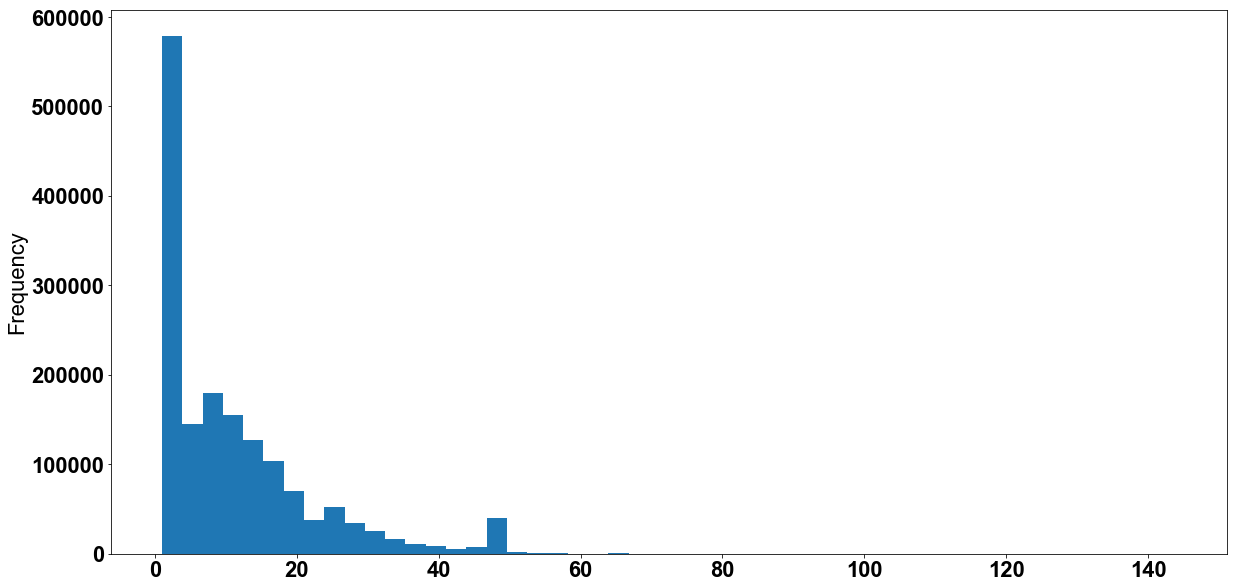

In [171]:
all_hbs.plot.hist(figsize=(20,10), bins = 50)

In [82]:
allJobs_encoded.shape

(1948714, 3663)

In [91]:
allHBLI_wide.WallClockTime.min(), allHBLI_wide.WallClockTime.max()

(0.0, 1.0)

In [89]:
allJobs_encoded.hbeat_start.min(), allJobs_encoded.hbeat_start.max()

(-119.7, 22280.716666666667)

In [93]:
print([x for x in allJobs_encoded.columns])

['JobID', 'Owner', 'OwnerDN', 'OwnerGroup', 'RescheduleCounter', 'start_submit', 'hbeat_start', 'JobType_MCProduction', 'JobType_MCProductionBGx0', 'JobType_Merge', 'JobType_Test', 'JobType_User', 'JobGroup_00000757', 'JobGroup_00000758', 'JobGroup_00000808', 'JobGroup_00000809', 'JobGroup_00000974', 'JobGroup_00000975', 'JobGroup_00001303', 'JobGroup_00001306', 'JobGroup_00001368', 'JobGroup_00001369', 'JobGroup_00001370', 'JobGroup_00001371', 'JobGroup_00001372', 'JobGroup_00001373', 'JobGroup_00001374', 'JobGroup_00001375', 'JobGroup_00001376', 'JobGroup_00001377', 'JobGroup_00001378', 'JobGroup_00001379', 'JobGroup_00001380', 'JobGroup_00001381', 'JobGroup_00001386', 'JobGroup_00001398', 'JobGroup_00001404', 'JobGroup_00001635', 'JobGroup_00001636', 'JobGroup_00001637', 'JobGroup_00001638', 'JobGroup_00001639', 'JobGroup_00001640', 'JobGroup_00001641', 'JobGroup_00001642', 'JobGroup_00001643', 'JobGroup_00001644', 'JobGroup_00001645', 'JobGroup_00001646', 'JobGroup_00001647', 'JobG